# SPEECH EMOTION RECOGNITION

In [ ]:
#IMPORT THE LIBRARIES
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
import IPython.display as ipd
from IPython.display import Audio
import tensorflow
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,BatchNormalization , GRU
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
#warnings.filterwhttp://localhost:8888/notebooks/Desktop/Speech%20Emotion%20RecognitionMajor%20Project/s_emotion%20recognition.ipynb#arnings("ignore", category=DeprecationWarning)


In [3]:
# path to the directory
RAVD = "C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\archive (1)\\audio_speech_actors_01-24\\"

In [4]:
import IPython.display as ipd
#ipd.Audio("C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\archive (1)\\Actor_01\\03-01-01-01-01-01-01.wav\\")


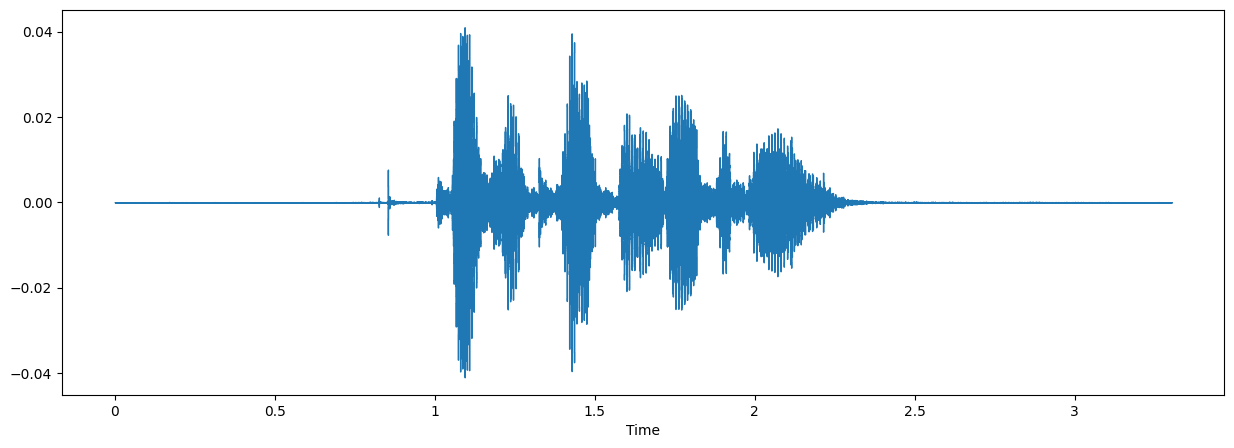

In [5]:
fname=("C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\archive (1)\\Actor_01\\03-01-01-01-01-01-01.wav")
data,sampling_rate = librosa.load(fname)
plt.figure(figsize=(15,5))
librosa.display.waveshow(data,sr=sampling_rate)
ipd.Audio(fname)

In [6]:
import time
lst=[]
TRAINING_FILES_PATH='trivial'
for subdir,dirs,files in os.walk(TRAINING_FILES_PATH):
    for file in files:
        try:
            X,sample_rate=librosa.load(os.path.join(subdir,file),res_type='kaiser_fast')
            mfccs=np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=2)
            file_class=int(file[7:8])-1
            arr=mfccs,file_class
            lst.append(arr)
        except ValueError as err:
            print(err)
            continue

In [7]:
dirl_list = os.listdir(RAVD)
dirl_list.sort()

emotion = []
gender = []
path = []
for i in dirl_list:
    fname = os.listdir(RAVD + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAVD + i + '/' + f)

        
RAVD_df = pd.DataFrame(emotion)
RAVD_df = RAVD_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAVD_df = pd.concat([pd.DataFrame(gender),RAVD_df],axis=1)
RAVD_df.columns = ['gender','emotion']
RAVD_df['labels'] =RAVD_df.gender + '_' + RAVD_df.emotion
RAVD_df['source'] = 'RAVDESS'  
RAVD_df = pd.concat([RAVD_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAVD_df = RAVD_df.drop(['gender', 'emotion'], axis=1)
RAVD_df.labels.value_counts()

labels
male_calm          96
male_happy         96
male_sad           96
male_angry         96
male_disgust       96
male_fear          96
male_surprise      96
female_calm        96
female_disgust     96
female_happy       96
female_sad         96
female_angry       96
female_surprise    96
female_fear        96
male_neutral       48
female_neutral     48
Name: count, dtype: int64

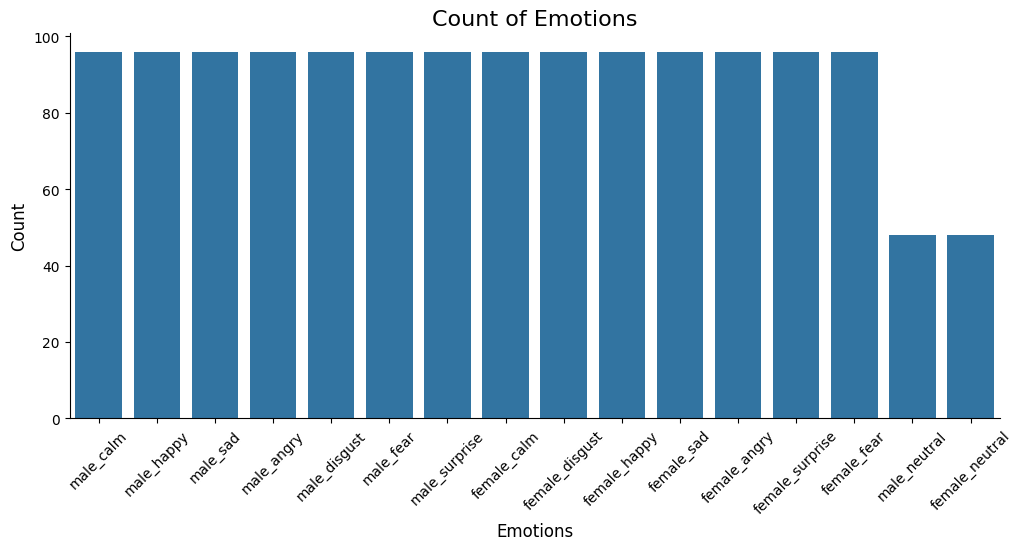

In [8]:
plt.figure(figsize=(12, 5))
plt.title('Count of Emotions', size=16)
sns.countplot(data=RAVD_df, x='labels', order=RAVD_df['labels'].value_counts().index)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [9]:
# Female Happy
fRA1= RAVD + 'Actor_08/03-01-03-02-02-01-08.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 


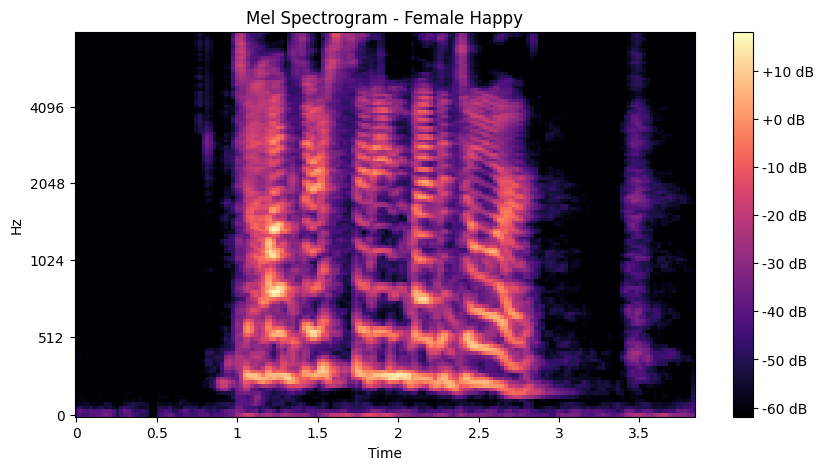

In [10]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Happy')
plt.colorbar(format='%+2.0f dB')

In [11]:
#Female Fear
fRA2=RAVD +'Actor_08/03-01-06-01-01-01-08.wav'
data, sr = librosa.load(fRA2)
ipd.Audio(fRA2) 

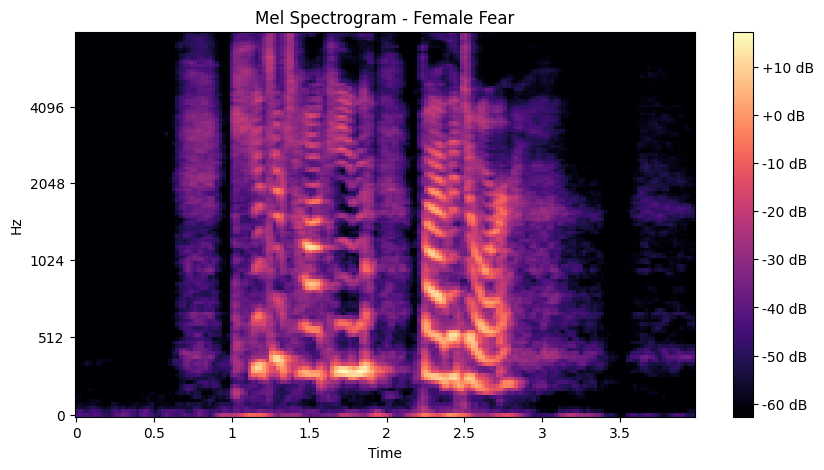

In [12]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Fear')
plt.colorbar(format='%+2.0f dB');

Next, we compare the waveplots of happy and fearful tracks

In [13]:
# Female Disgust
fRA1 =RAVD +'Actor_20/03-01-08-02-02-02-20.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 

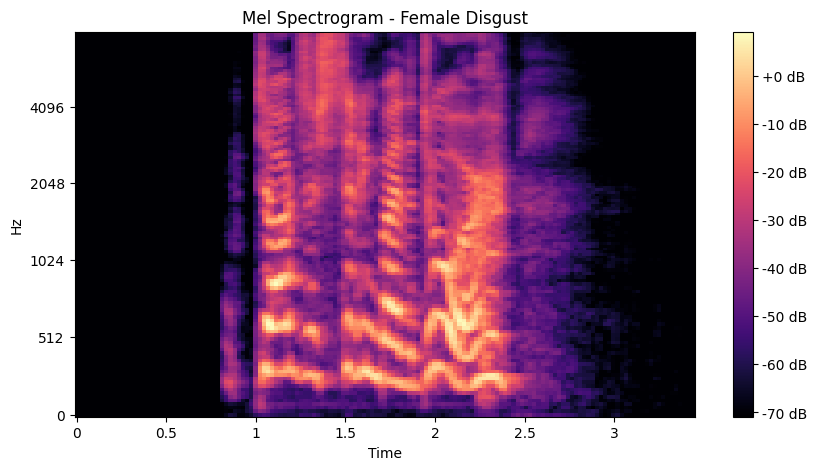

In [14]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Female Disgust')
plt.colorbar(format='%+2.0f dB');

In [15]:
# Male Fearfull
fRA1 = RAVD + 'Actor_19/03-01-04-01-02-01-19.wav'
data, sr = librosa.load(fRA1)
ipd.Audio(fRA1) 

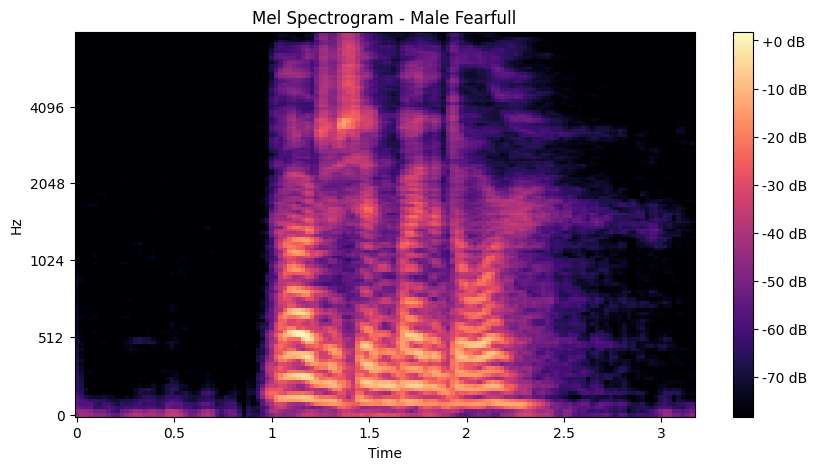

In [16]:
# CREATE LOG MEL SPECTROGRAM
plt.figure(figsize=(10, 5))
spectrogram = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128,fmax=8000) 
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram - Male Fearfull')
plt.colorbar(format='%+2.0f dB');

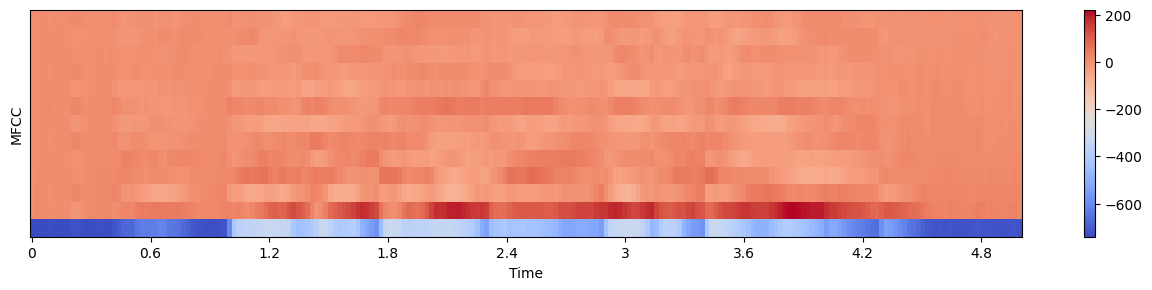

In [17]:
# Gender - Female; Emotion - Angry
import resampy 
path = "C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\archive (1)\\Actor_08\\03-01-05-01-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


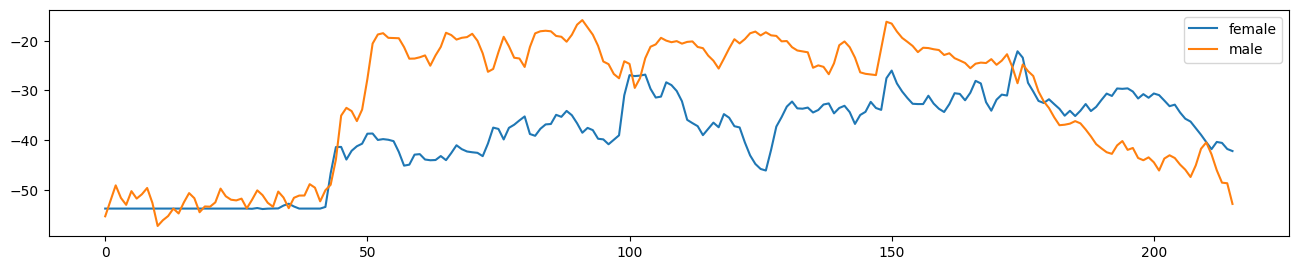

In [18]:
import librosa
# Gender - Female; Emotion - angry
path = 'C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\archive (1)\\Actor_18\\03-01-05-01-01-01-18.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - angry
path = "C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\archive (1)\\Actor_17\\03-01-05-01-01-02-17.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

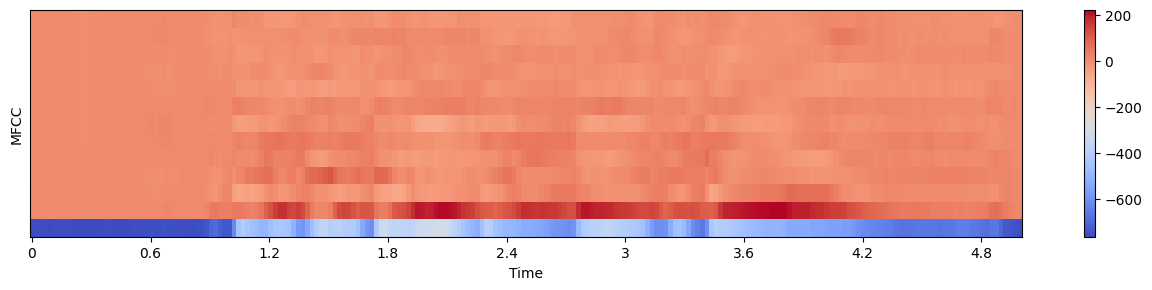

In [19]:
# Gender - Male; Emotion - Angry 
path = 'C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\archive (1)\\Actor_17\\03-01-05-01-01-02-17.wav'
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)


# MFCC
plt.figure(figsize=(16, 10))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

216
216


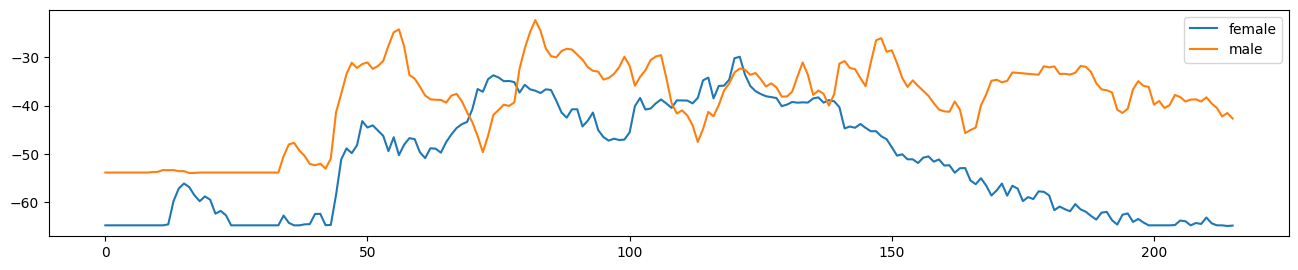

In [20]:
# Gender - Female; Emotion - Surprised
path = "C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\archive (1)\\Actor_20\\03-01-08-02-01-02-20.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Gender - Male; Emotion - Surprised
path = "C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\archive (1)\\Actor_20\\03-01-08-02-01-01-20.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(16,10))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

**Again we combine the emotion of suprised male female then again male has higher pitch**

# DATA AUGMENTATION



In [21]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
# NOISE
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data
# STRETCH
def stretch(data,rate=0.8):
    return librosa.effects.time_stretch(data, rate=rate)
    
# SHIFT
def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)
# PITCH
def pitch(data, sampling_rate, pitch_factor=0.7):
    n_steps=pitch_factor*12
    return librosa.effects.pitch_shift(data, sr=sampling_rate,n_steps=n_steps)

In [22]:
# Trying different functions above
path = np.array(RAVD_df['path'])[471]
data, sample_rate = librosa.load(path)

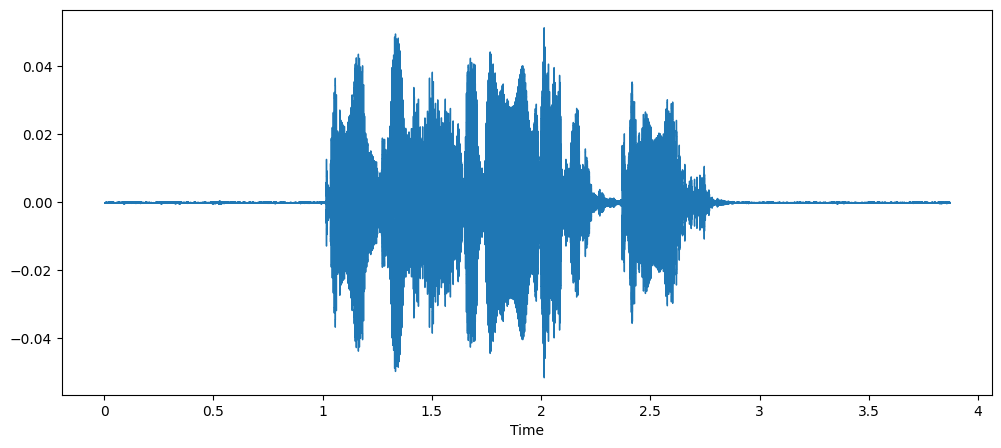

In [23]:
# NORMAL AUDIO


import librosa.display
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

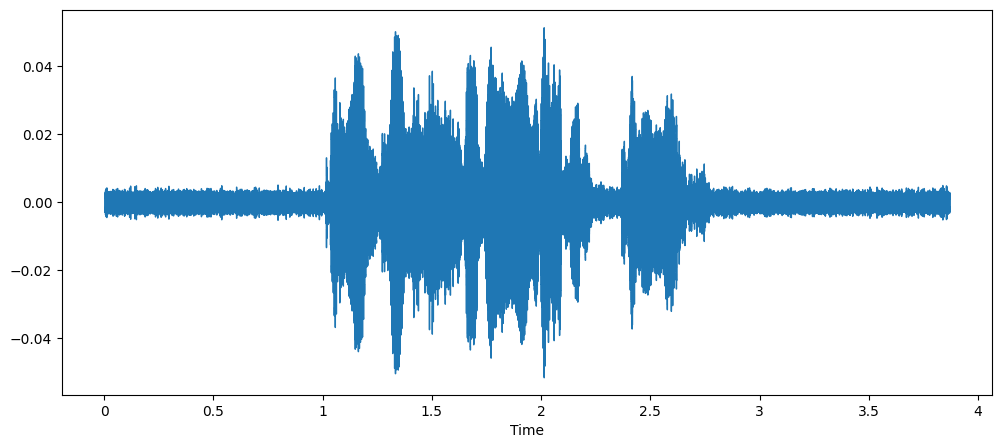

In [24]:
# AUDIO WITH NOISE
x = noise(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

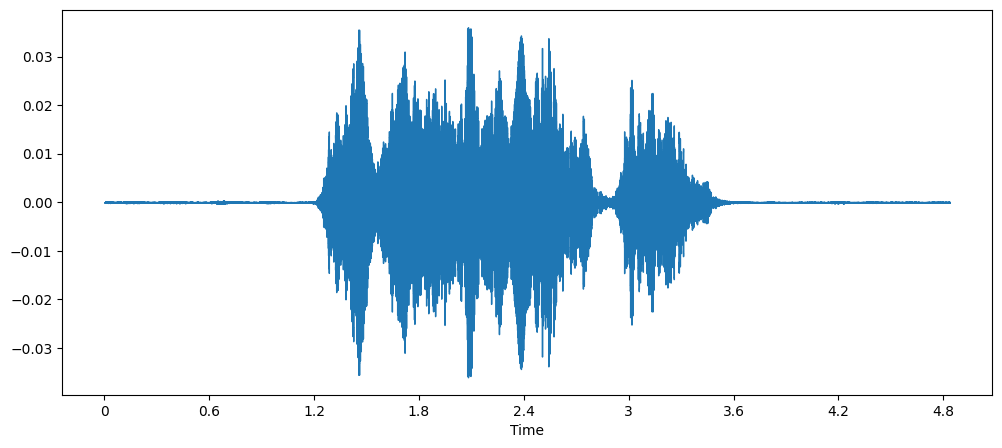

In [25]:
# STRETCHED AUDIO
x= stretch(data)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

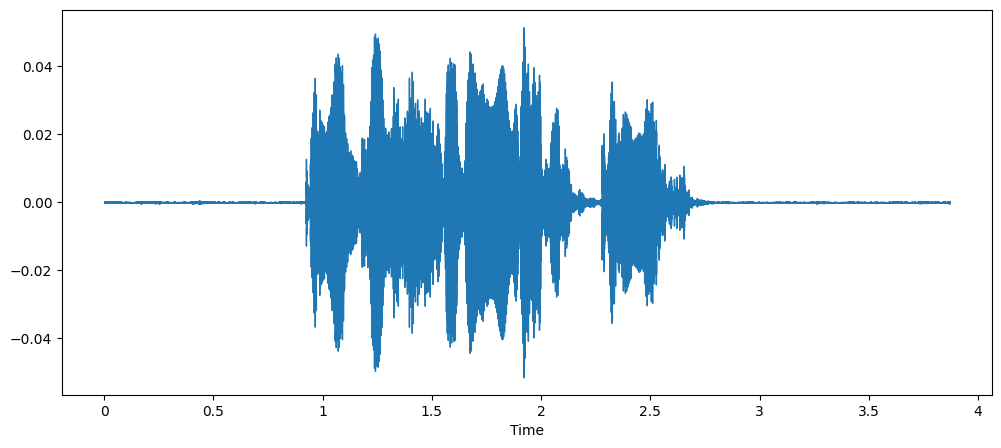

In [26]:
# SHIFTED AUDIO
x = shift(data)
plt.figure(figsize=(12,5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

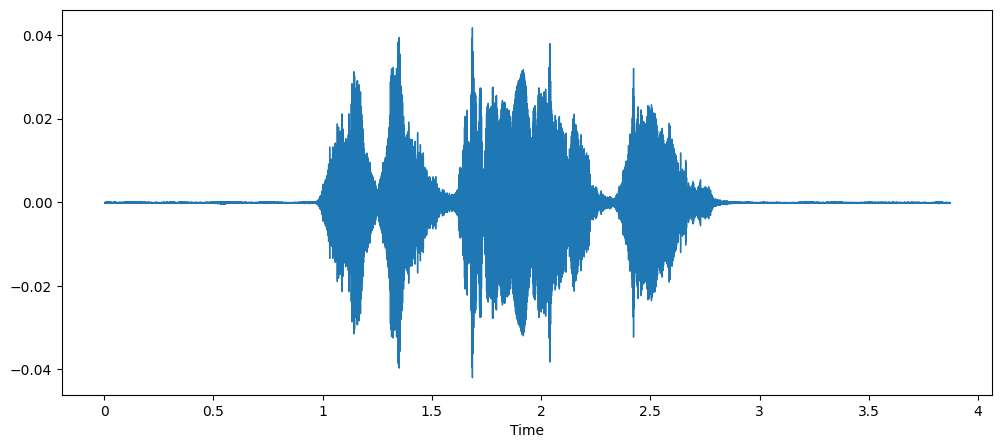

In [27]:
# AUDIO WITH PITCH
x = pitch(data, sample_rate)
plt.figure(figsize=(12, 5))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

**After listening to all audio we determine to use noise, shift and stretch**

# FEATURE EXTRACTION

In [28]:

def feat_ext(data):
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    return mfcc

def get_feat(path):
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    # normal data
    res1 = feat_ext(data)
    result = np.array(res1)
    #data with noise
    noise_data = noise(data)
    res2 = feat_ext(noise_data)
    result = np.vstack((result, res2))
    #data with stretch and pitch
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = feat_ext(data_stretch_pitch)
    result = np.vstack((result, res3))
    return result

In [29]:
RAVD_df.head()

labels   source                                               path
0  male_neutral  RAVDESS  C:\Users\lavan\OneDrive\Desktop\ser\archive (1...
1  male_neutral  RAVDESS  C:\Users\lavan\OneDrive\Desktop\ser\archive (1...
2  male_neutral  RAVDESS  C:\Users\lavan\OneDrive\Desktop\ser\archive (1...
3  male_neutral  RAVDESS  C:\Users\lavan\OneDrive\Desktop\ser\archive (1...
4     male_calm  RAVDESS  C:\Users\lavan\OneDrive\Desktop\ser\archive (1...

In [30]:
X, Y = [], []
Emotions = pd.read_csv('C:\\Users\\lavan\\OneDrive\\Desktop\\ser\\emotion.csv')
Emotions.head()

0 th order coefficient  1st order coefficient  2nd order coefficient  \
0             -647.205017              74.494820              -1.027088   
1             -472.945167              36.631289               7.330169   
2             -714.374512              73.627441              -3.383080   
3             -636.119141              74.385246              -5.053098   
4             -508.904751              43.608484               5.074814   

   3rd order coefficient  4th order coefficient  5th order coefficient  \
0              18.256382               8.400715               2.474266   
1              11.100827               6.513339               0.049588   
2              19.450293               5.375023               1.764676   
3              22.253006               8.646654               0.856430   
4              14.496293               7.032581              -1.965210   

   6th order coefficient  7th order coefficient  8th order coefficient  \
0              -6.123550              -2.492466             -16.309069   
1              -3.866884              -7.118442             -10.392079   
2              -8.947500              -3.630324             -18.455372   
3              -4.796639              -5.969506             -18.153780   
4              -3.725150              -8.789906             -12.272562   

   9th order coefficient  ...  11 th order coefficient  \
0              -2.110272  ...                -2.432193   
1              -6.268243  ...                -1.903366   
2               2.115432  ...                -1.074866   
3              -0.742294  ...                -2.366808   
4              -4.561940  ...                -2.425101   

   12th order coefficient  13 th order coefficient  \
0                0.957063                -3.460787   
1               -1.443264                -1.551624   
2                0.077275                -3.825186   
3               -1.034440                -3.251642   
4               -2.171814                -2.810623   

   Delta of 0th order coefficient  Delta of 1st order coefficient  \
0                       -0.890993                        2.436301   
1                       -1.203280                       -0.537476   
2                       -0.892825                        0.224743   
3                       -2.338206                        1.708331   
4                       -1.800763                        0.038669   

   Delta of 2nd order coefficient  Delta of 3rd order coefficient  \
0                       -6.758149                       -1.168994   
1                       -4.358109                       -3.464462   
2                       -7.663175                       -1.202183   
3                       -8.010625                       -0.221001   
4                       -5.094466                       -3.301223   

   Delta of 4th order coefficient  Delta of 5th order coefficient  \
0                       -2.999688                       -0.060076   
1                        0.169619                       -2.026725   
2                       -2.900960                       -3.214236   
3                       -4.311788                        1.725494   
4                       -1.214210                       -2.037468   

         labels  
0  male_neutral  
1  male_neutral  
2  male_neutral  
3  male_neutral  
4  male_neutral  

[5 rows x 21 columns]

# DATA PREPROCESSING

In [31]:
X = Emotions.iloc[: ,:-1].values
Y = Emotions['labels'].values

In [32]:
# As this is a multiclass classification problem onehotencoding our Y
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [33]:
# Train and Test Split 
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
#x_train.shape, y_train.shape, x_test.shape, y_test.shape

In [34]:
# Reshape for LSTM 
X_train = x_train.reshape(x_train.shape[0] , x_train.shape[1] , 1)
X_test = x_test.reshape(x_test.shape[0] , x_test.shape[1] , 1)


In [35]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#x_train.shape, y_train.shape, x_test.shape, y_test.shape

## **MLP CLASSIFIER**

In [36]:
from sklearn.neural_network import MLPClassifier
clf2=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(2300,), learning_rate='adaptive', max_iter=800)
clf2.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(2300,),
              learning_rate='adaptive', max_iter=800)

In [37]:
print("Accuracy of Training set: {:.8f}".format(clf2.score(x_train, y_train)*100))
print("Accuracy of Testing set : {:.8f}".format(clf2.score(x_test, y_test)*100))

Accuracy of Training set: 100.00000000
Accuracy of Testing set : 68.79629630


## **CNN LSTM**

In [38]:
#CNN
x_traincnn =np.expand_dims(x_train, axis=2)
x_testcnn= np.expand_dims(x_test, axis=2)
x_traincnn.shape, y_train.shape, x_testcnn.shape, y_test.shape

((3240, 20, 1), (3240, 16), (1080, 20, 1), (1080, 16))

In [39]:
#CNN
import tensorflow as tf 
model = Sequential()
model.add(Conv1D(2048, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(1024, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(Conv1D(512, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2, strides = 2, padding = 'same'))
model.add(BatchNormalization())

model.add(LSTM(256, return_sequences=True))

model.add(LSTM(128))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(16, activation='softmax'))

optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 20, 2048)       │        12,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 10, 2048)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10, 2048)       │         8,192 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 10, 1024)       │    10,486,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 5, 1024)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 1024)        │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 5, 512)         │     2,621,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 3, 512)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 512)         │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 256)         │       787,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,147,312 (53.97 MB)

 Trainable params: 14,140,144 (53.94 MB)

 Non-trainable params: 7,168 (28.00 KB)

In [40]:
#CNN
history = model.fit(x_traincnn, y_train, batch_size=64, epochs=50, validation_data=(x_testcnn, y_test))

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 652ms/step - accuracy: 0.0915 - loss: 2.7619 - val_accuracy: 0.0713 - val_loss: 2.7678
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 32s 632ms/step - accuracy: 0.1113 - loss: 2.7046 - val_accuracy: 0.0861 - val_loss: 2.7655
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 33s 656ms/step - accuracy: 0.1311 - loss: 2.6419 - val_accuracy: 0.0676 - val_loss: 2.7629
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 33s 654ms/step - accuracy: 0.1468 - loss: 2.5739 - val_accuracy: 0.0731 - val_loss: 2.7469
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 34s 673ms/step - accuracy: 0.1695 - loss: 2.5078 - val_accuracy: 0.1343 - val_loss: 2.6999
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 39s 776ms/step - accuracy: 0.1861 - loss: 2.3952 - val_accuracy: 0.0722 - val_loss: 2.7091
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 38s 743ms/step - accuracy: 0.2181 - loss: 2.2984 - val_accuracy: 0.0861 - val_loss: 2.6738
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 33s 647ms/step - accuracy: 0.2484 - loss: 2.2043 - val_accu

In [41]:
#CNN
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
print("Accuracy of our model on test data : " , model.evaluate(x_testcnn,y_test)[1]*100 , "%")

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.7597 - loss: 1.1312
Accuracy of our model on test data :  76.75926089286804 %


In [42]:
#CNN
pred_test = model.predict(x_testcnn)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)

34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step


Predicted Labels    Actual Labels
0      female_fear      female_fear
1       male_happy       male_angry
2      female_fear      female_fear
3      female_calm      female_calm
4     female_angry     female_angry
5  female_surprise  female_surprise
6         male_sad        male_fear
7       male_happy       male_happy
8      female_fear      female_fear
9         male_sad         male_sad

# Confusion Matrix Using CNN LSTM

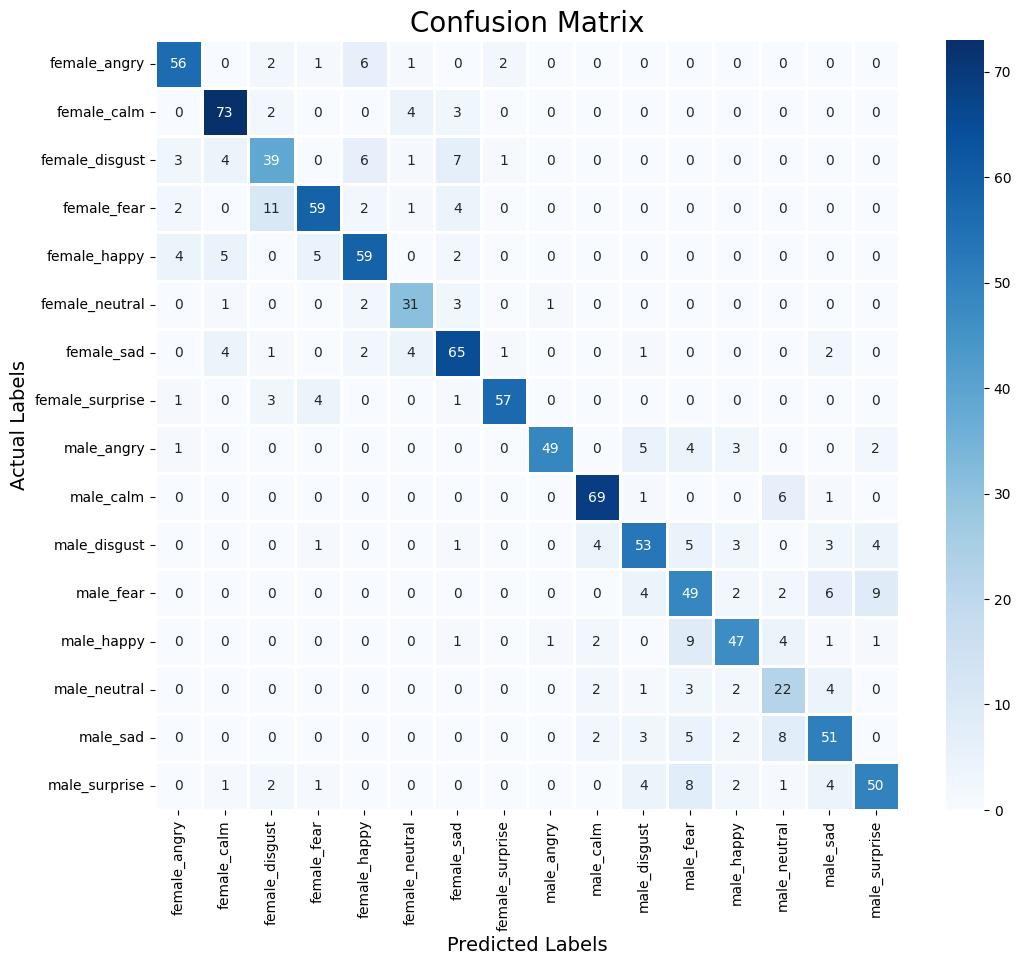

In [43]:
#CNN
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

# Classification Report Using CNN LSTM

In [44]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

   female_angry       0.84      0.82      0.83        68
    female_calm       0.83      0.89      0.86        82
 female_disgust       0.65      0.64      0.64        61
    female_fear       0.83      0.75      0.79        79
   female_happy       0.77      0.79      0.78        75
 female_neutral       0.74      0.82      0.78        38
     female_sad       0.75      0.81      0.78        80
female_surprise       0.93      0.86      0.90        66
     male_angry       0.96      0.77      0.85        64
      male_calm       0.87      0.90      0.88        77
   male_disgust       0.74      0.72      0.73        74
      male_fear       0.59      0.68      0.63        72
     male_happy       0.77      0.71      0.74        66
   male_neutral       0.51      0.65      0.57        34
       male_sad       0.71      0.72      0.71        71
  male_surprise       0.76      0.68      0.72        73

       accuracy              

**After completing the all training part we got good accuracy using CNN so we plot the confusion matrix and classification report.**